In [290]:
import numpy as np
import pandas as pd
import random

# libraries for plotting graphs/animations
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import CircleCollection, PatchCollection, LineCollection
from matplotlib.patches import Circle
from matplotlib.widgets import Slider

from IPython.display import HTML

In [10]:
# to enable the saving videos
# !conda install -c conda-forge ffmpeg

In [157]:
FRAMES = np.random.randint(low=1, high=100, size=5)
SCATTER_INDEX = [0]

for i in range(len(FRAMES)):
    SCATTER_INDEX.append(SCATTER_INDEX[-1] + FRAMES[i])

<IPython.core.display.Javascript object>


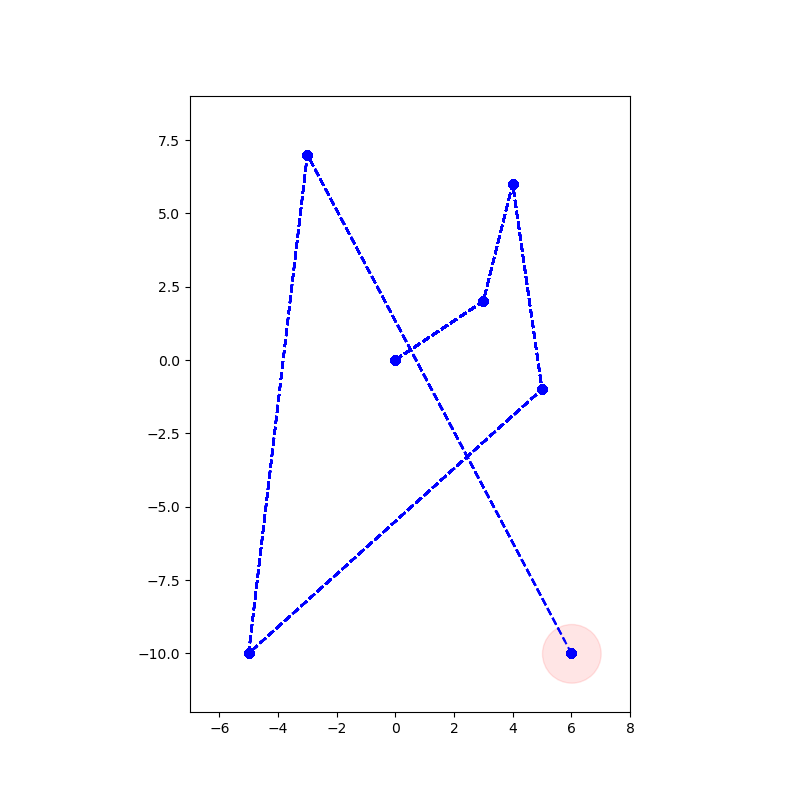

In [400]:
plt.close()

def temp(points, radii=[], figsize=(8,8)):    
    def discretise(start, end, frames):
        t = np.linspace(0, 1, frames)
        x = t*end[0] + (1-t)*start[0]
        y = t*end[1] + (1-t)*start[1]
        return np.array(x), np.array(y)

    NUM_POINTS = len(points)
    FRAMES = np.random.randint(low=1, high=100, size=NUM_POINTS-1)
    radii = np.random.randint(low=1, high=3, size=NUM_POINTS)

    SCATTER_INDEX = [0]

    for i in range(len(FRAMES)):
        SCATTER_INDEX.append(SCATTER_INDEX[-1] + FRAMES[i])

    fig, ax = plt.subplots(1,1,figsize=figsize)

    x_start = min(points[:,0]) - 2
    x_end = max(points[:,0]) + 2
    y_start = min(points[:,1]) -2
    y_end = max(points[:,1]) + 2

    # uncomment if you want the whole plot with no margins, no x, y axis at all
    #     fig.add_axes([0, 0, 1, 1])

    ax.set_xlim(x_start, x_end)
    ax.set_ylim(y_start, y_end)
    
    ax.set_aspect('equal')
    
    x_all = []
    y_all = []

    for i in range(NUM_POINTS-1):
        x, y = discretise(points[i], points[i+1], FRAMES[i])
        x_all = np.concatenate([x_all, x])
        y_all = np.concatenate([y_all, y])

    # creating a collection of circles
    patches = []
    patches.append( Circle((points[0,0], points[0,1]), radii[0]) )
    
    # style the collection of circles
    collection = PatchCollection(patches, edgecolors='r', facecolors='r', alpha=0.1)

    # add the circles to the plot
    ax.add_collection(collection)
    
    ax.plot(x_all[0], y_all[0], linestyle="--", color="b")

    def animate(i):
        ax.plot(x_all[:i], y_all[:i], linestyle="--", color="b")
        ax.scatter(points[:,0], points[:,1], color="b")
        
        patches = []
        patches.append( Circle((x_all[i], y_all[i]), radii[0]) )
        
        # Update the collection, with the objects (Circle etc)
        collection.set_paths(patches)

    # Construct the animation, using the update function as the animation director.
    anim = FuncAnimation(fig, animate, frames=sum(FRAMES)+1, repeat=False)

    return anim

points = np.array([[0,0], [3,2], [4,6], [5,-1], [-5,-10], [-3,7], [6,-10]])
temp(points)

<IPython.core.display.Javascript object>


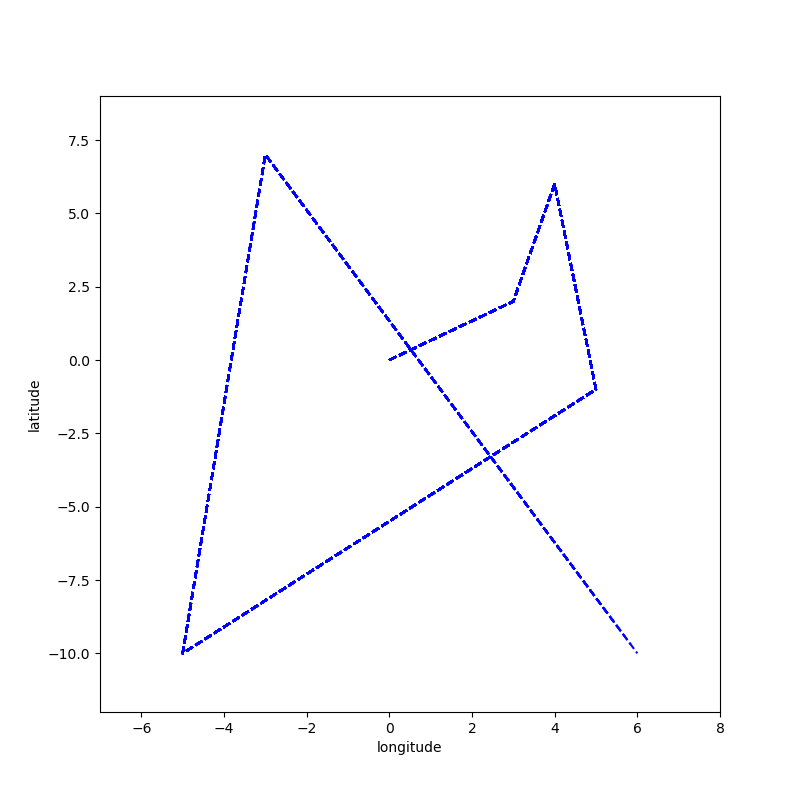

In [327]:
plt.close()
animateTraj(points)

In [387]:
points

array([], shape=(0, 2), dtype=int32)

<IPython.core.display.Javascript object>


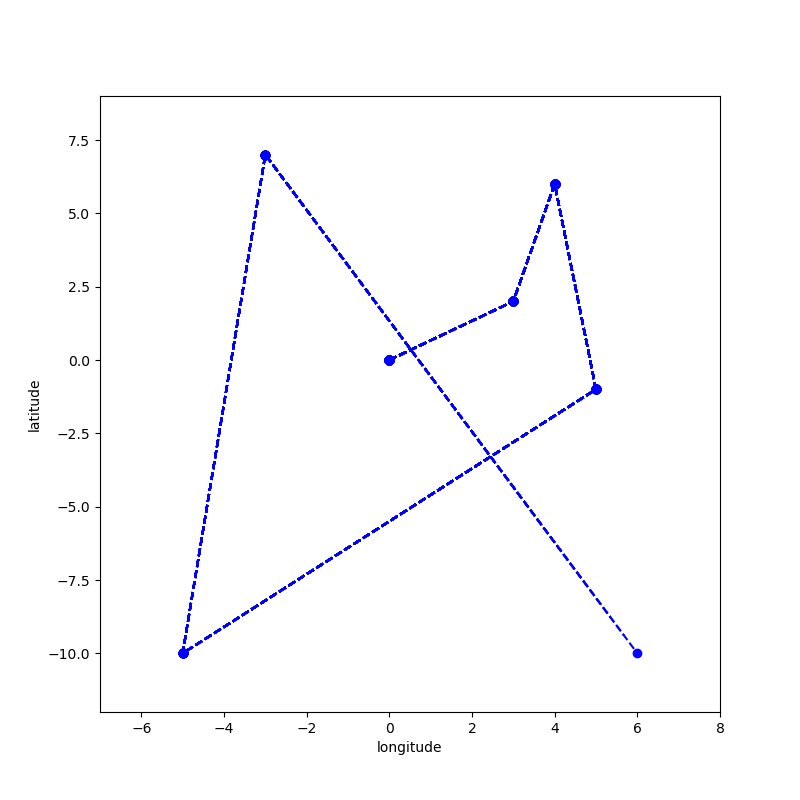

In [395]:
animateTraj(points)

In [398]:
%matplotlib notebook
%matplotlib notebook

def animateTraj(points, radii=[], figsize=(8,8)):    
    def discretise(start, end, frames):
        t = np.linspace(0, 1, frames)
        x = t*end[0] + (1-t)*start[0]
        y = t*end[1] + (1-t)*start[1]
        return np.array(x), np.array(y)

    NUM_POINTS = len(points)
    FRAMES = np.random.randint(low=1, high=30, size=NUM_POINTS-1)
    radii = np.random.randint(low=1, high=3, size=NUM_POINTS)

    SCATTER_INDEX = [0]

    for i in range(len(FRAMES)):
        SCATTER_INDEX.append(SCATTER_INDEX[-1] + FRAMES[i])
        
    SCATTER_INDEX.pop(0)

    fig, ax = plt.subplots(1,1,figsize=figsize)

    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

    x_start = min(points[:,0]) - 2
    x_end = max(points[:,0]) + 2
    y_start = min(points[:,1]) -2
    y_end = max(points[:,1]) + 2

    # uncomment if you want the whole plot with no margins, no x, y axis at all
    #     fig.add_axes([0, 0, 1, 1])

    ax.set_xlim(x_start, x_end)
    ax.set_ylim(y_start, y_end)

    x_all = []
    y_all = []

    for i in range(NUM_POINTS-1):
        x, y = discretise(points[i], points[i+1], FRAMES[i])
        x_all = np.concatenate([x_all, x])
        y_all = np.concatenate([y_all, y])

    def animate(i):
        global count
        if i == 0:
            count = 1
        
        if (len(SCATTER_INDEX) > 0) and (i == SCATTER_INDEX[0]):
            count += 1
            SCATTER_INDEX.pop(0)

        ax.plot(x_all[:i], y_all[:i], linestyle="--", color="b")
        ax.scatter(points[:count,0], points[:count,1], color="b")
        
#         return count

    # Construct the animation, using the update function as the animation director.
    anim = FuncAnimation(fig, animate, frames=sum(FRAMES)+1, repeat=False)

    return anim
    
def movingCircles(startPoints, destPoints, radii, frames=20, figsize=(8,8)):
    '''
    Animates the movement of any arbitrary number of circles.
    The circles' radii is fixed across time and can only travel in a straight line.
    The radii are not to scale but are proportional to other radii.
    
    :param startPoints: an np.array of floats of size = (N,2) for any integer N
    :param destPoints: an np.array of floats of size = (N,2) for any integer N
    :param radii: an np.array of floats of size = (N,1) for any integer N, 
        radii[i] is the radius of the ith circle travelling from startPoints[i] to destPoints[i]
    :param frames: number of frames for the animation
    :param figsize: size of the plot of the animation
    :return: a video of the animation
    '''
    NUM_POINTS = len(startPoints)
    
    # Create new Figure
    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    # specify the dimensions of the plot
    x_start = min(min(startPoints[:,0]), min(destPoints[:,0]))
    x_end = max(max(startPoints[:,0]), max(destPoints[:,0]))
    y_start = min(min(startPoints[:,1]), min(destPoints[:,1]))
    y_end = max(max(startPoints[:,1]), max(destPoints[:,1]))

#     uncomment if you want the whole plot with no margins, no x, y axis at all
#     ax = fig.add_axes([0, 0, 1, 1])

    ax.set_xlim(x_start, x_end)
    ax.set_ylim(y_start, y_end)
    
    # creating a collection of circles
    patches = []
    for i in range(NUM_POINTS):
        patches.append( Circle((startPoints[i,0], startPoints[i,1]), radii[i]) )
    
    # style the collection of circles
    collection = PatchCollection(patches, edgecolors='b', facecolors='none')

    # add the circles to the plot
    ax.add_collection(collection)
        
    def updateOnept(start, end, i):
        '''
        :param start: starting (x,y)-coordinate
        :param end: ending (x,y)-coordinate
        :param i: the ith step
        :return: discretise the line segment from start to end into `frames` number of points and
            returns the ith point
        '''
        t = np.linspace(0, 1, frames+1)
        x = t[i]*end[0] + (1-t[i])*start[0]
        y = t[i]*end[1] + (1-t[i])*start[1]
        
        return np.array([x,y])
    
    def animate(i):
        '''
        shift the centers of the circles by some distance and plot the scatterplot
        :param i: index i
        :return scat: the scatter plot
        '''
        updated_pts = np.zeros((NUM_POINTS,2))
        
        # update the centers of the circles
        for j in range(NUM_POINTS):
            updated_pts[j] = updateOnept(startPoints[j], destPoints[j], i)
        
        # append the circles with new centers
        patches = []
        for j in range(NUM_POINTS):
            circle = plt.Circle((updated_pts[j,0], updated_pts[j,1]), radii[j])
            patches.append(circle)

        # Update the collection, with the objects (Circle etc)
        collection.set_paths(patches)
        
    # Construct the animation, using the update function as the animation director.
    anim = FuncAnimation(fig, animate, frames=frames, repeat=False, blit=False)
    
    return anim

<IPython.core.display.Javascript object>


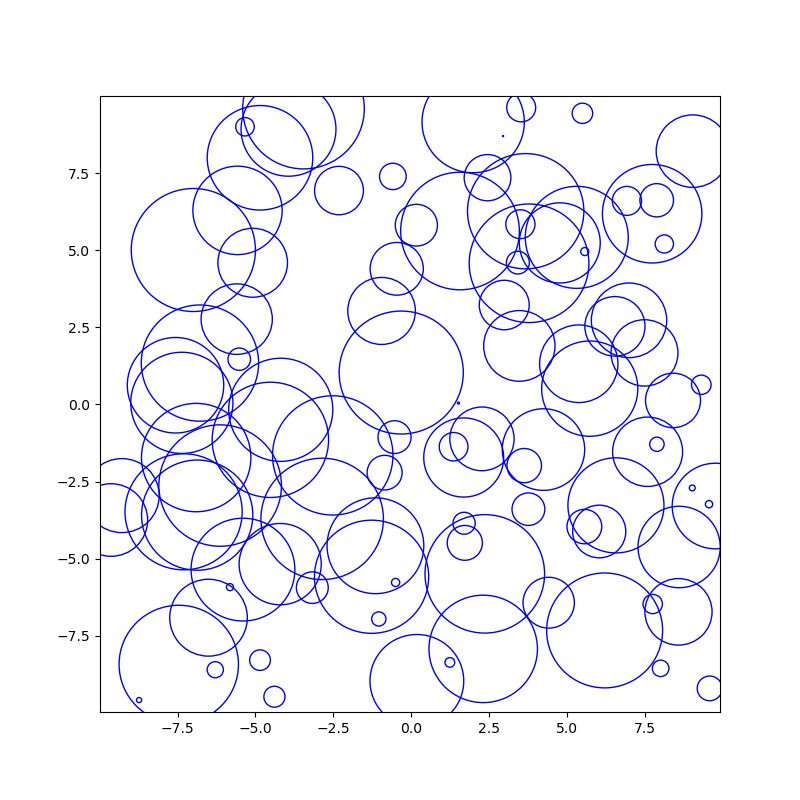

In [396]:
plt.close()

NUM_POINTS = 100

# randomly generate decimals in [-10,10], where array size is (NUM_POINTS,2)
startPoints = np.random.uniform(-10,10, size=(NUM_POINTS,2))
destPoints = np.random.uniform(-10,10, size=(NUM_POINTS,2))

# randomly generate decimals in [0,2], where array size is (NUM_POINTS,1)
radii = np.random.uniform(0,2, size=(NUM_POINTS,1))

animation = movingCircles(startPoints, destPoints, radii, frames=51)

In [284]:
video = HTML(animation.to_html5_video())
video